# Application of classification model

## This project is to predict whether a person makes over 50K per year or not from different classification models on adult dataset . The description of the dataset is as follows:

### Data Set Information:
####            Extraction was done by Barry Becker from the 1994 Census database. A set of
####            reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
####            (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

### Problem 1:
### Prediction task is to determine whether a person makes over 50K a year ?

### Attribute Information:
####            Listing of attributes:
####                  wage_class: >50K, <=50K.
####                  age: continuous.
####                  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
####                  Without-pay, Never-worked.
####                  fnlwgt: continuous.
####                  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
####                                                9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
####                  education-num: continuous.

####                  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
####                                                Married-spouse-absent, Married-AF-spouse.

####                  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-
####                                                specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,

####                                                Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
####                   relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
####                   race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
####                   sex: Female, Male.
####                   capital-gain: continuous.
####                   capital-loss: continuous.
####                   hours-per-week: continuous.
####                   native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
####                                              Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
####                                              Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
####                                              Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
####                                              Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
####                                              Holand-Netherlands.

In [1]:
# Importing libraries to play with data
import numpy as np
import pandas as pd

from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import functools

# Data loading

In [2]:
# Importing the train data itself
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

# Importing the test data itself
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
#setting column names 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
#showing top 5 records of training set
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#showing top 5 records of test set
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#showing datatypes of all the features
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [7]:
#showing size of train dataset
train_set.shape

(32561, 15)

In [8]:
#showing size of test dataset
test_set.shape

(16281, 15)

In [9]:
#getting all values of workclass column
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
#getting all values of country column
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Exploratory Data Analysis(EDA)

In [11]:
#how many unique categories we have in occupation 
occupation_set = set(train_set['occupation'])
print(occupation_set)

{' Sales', ' Adm-clerical', ' Transport-moving', ' Handlers-cleaners', ' Machine-op-inspct', ' ?', ' Farming-fishing', ' Tech-support', ' Craft-repair', ' Protective-serv', ' Other-service', ' Exec-managerial', ' Armed-Forces', ' Priv-house-serv', ' Prof-specialty'}


In [12]:
#Now classify them as numers instead of their names in train set
train_set['occupation'] = train_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [13]:
# Now classify them as numers instead of their names in test set
test_set['occupation'] = test_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [14]:
#Just printing top 5 records to see if nothing gone wrong
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,3,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,7,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,4,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,4,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
#Just printing top 5 records to see if nothing gone wrong
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.


In [16]:
#mapping wage_class(income) into integer columns to classify over train dataset
train_set['wage_class'] = train_set['wage_class'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [17]:
#mapping wage_class(income) into integer columns to classify over test dataset
test_set['wage_class'] = test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1}).astype(int)

In [18]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

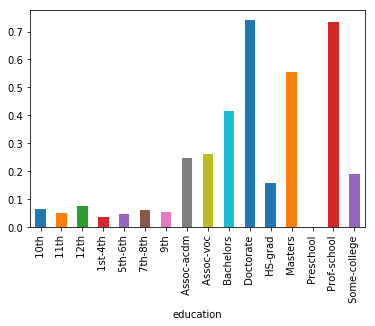

In [19]:
#plotting graph to show relation between wage_class(income) and education 
train_set.groupby('education')['wage_class'].mean().plot(kind='bar')

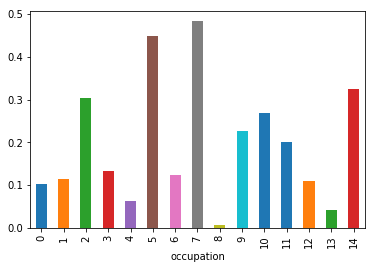

In [20]:
#plotting graph to show relation between wage_class(income) and occupation 
train_set.groupby('occupation')['wage_class'].mean().plot(kind='bar')

In [21]:
#Transforming the Sex into 0 and 1
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [22]:
#Transforming the Sex into 0 and 1
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [23]:
#Getting how many unique races we have here.
race_set = set(train_set['race'])
print(race_set)

{' Other', ' Amer-Indian-Eskimo', ' White', ' Black', ' Asian-Pac-Islander'}


In [24]:
#mapping races to integer values in train dataset
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [25]:
#mapping races to integer values in test dataset
test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [26]:
#Getting how many unique maritial status we have here.
mstatus_set = set(train_set['marital_status'])
print(mstatus_set)

{' Divorced', ' Separated', ' Married-AF-spouse', ' Married-civ-spouse', ' Widowed', ' Married-spouse-absent', ' Never-married'}


In [27]:
#mapping maritial status to integer values in train dataset
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [28]:
#mapping maritial status to integer values in test dataset
test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [29]:
#showing top 5 records
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,5,3,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,7,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,4,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,4,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,5,Wife,0,1,0,0,40,Cuba,0


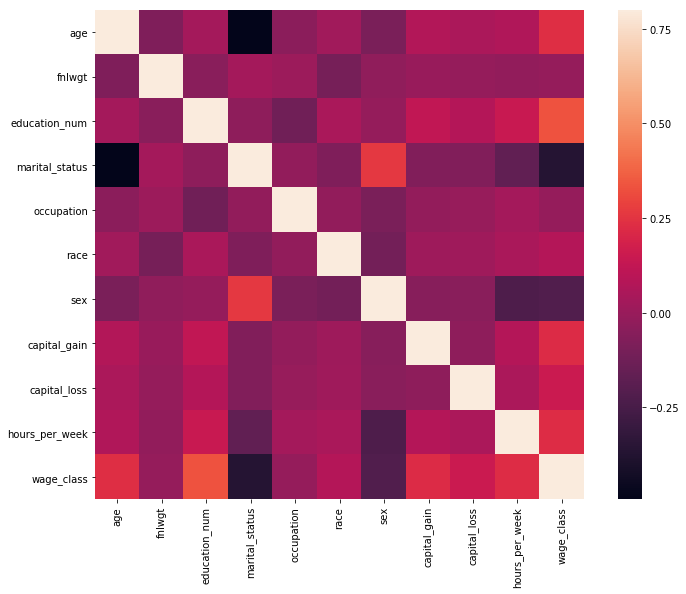

In [30]:
#importing seaborn library to find relation between features
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = train_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

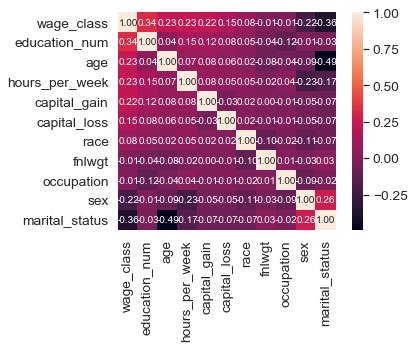

In [31]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'wage_class')['wage_class'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

"""
<b>
    
# Problem 2:
## Which factors are important  ?

# <font color='red'> From above plot it is clear that - 'education_num' , 'age' , 'hours_per_week', 'capital_gain' ,' capital_loss' and 'race' are effecting to the wage_class(income) of the person .Other features don't have correlation with income of the person , So we will use only these features for our machine learning model.</font>
</b>
"""

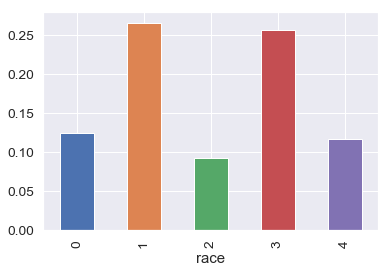

In [32]:
#plotting income classified by race
train_set.groupby('race')['wage_class'].mean().plot(kind='bar')

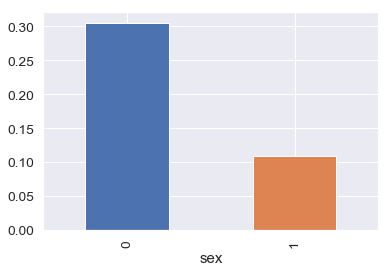

In [33]:
#plotting income classified by sex
train_set.groupby('sex')['wage_class'].mean().plot(kind='bar')

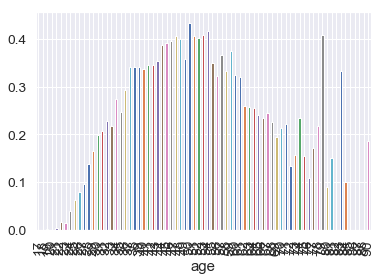

In [34]:
#plotting income classified by age
train_set.groupby('age')['wage_class'].mean().plot(kind='bar')

<b>

"""
# Conclusion: 

## We achieved our goal by seeing the data closer, trying to understand it's realtions among the features.After that, we explore the data a little bit more and learnt that:

### 1.Men have more chances to have a higher income.\n
### 2.White and Asian Pacific Islanders have more chances than other races\n
### 3.Income sort of follows the normal deviation, with a peak at 50 years old

"""</b>

In [35]:
# Taking only the features that is important for now
X_train = train_set[['education_num', 'age', 'hours_per_week', 'capital_gain','capital_loss','race']]

# Taking the labels(Income)
Y_train = train_set['wage_class']

# Taking only the features that is important for now
X_test = test_set[['education_num', 'age', 'hours_per_week', 'capital_gain','capital_loss','race']]

# Taking the labels(Income)
Y_test = test_set['wage_class']

# Model building 

In [36]:
#1.
from sklearn.linear_model import LogisticRegression  

In [37]:
#importing package to find accuracy of the model
from sklearn.metrics import confusion_matrix

In [38]:
#importing package to show accuracy of model 
from sklearn.metrics import accuracy_score

In [39]:
#importing these packages for predicting accuracy of the model
from sklearn.metrics import classification_report

# LogisticRegression Classification Model:

In [40]:
#creating instance of model 
classifier1 = LogisticRegression(solver='lbfgs',max_iter=4000)

# Create an instance of Logistic Regression Classifier and fit the data.
classifier1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
#predicting the test results 
predictions1 = classifier1.predict(X_test)

In [42]:
#predicted output set
predictions1

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
#generating confusion matrix of model
cm1=confusion_matrix(Y_test,predictions1)

In [44]:
#confusion matrix
cm1

array([[11751,   684],
       [ 2332,  1514]], dtype=int64)

In [45]:
#predicting accuracy of model 
accuracy1=accuracy_score(Y_test,predictions1)

#printing the final accuracy result
print("Accuracy of the Logistic Regression Model is : " +str(accuracy1*100) +" %")

Accuracy of the Logistic Regression Model is : 81.47533935261961 %


# Decision Tree Classification Model:

In [46]:
#2.
#importing DecisionTreeClassifier for fitting model in decision tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
#creating instance of DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy')

In [48]:
#fitting the model in decision tree
classifier2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
#predicting the output and storing in 'prediction' from model
predictions2 = classifier2.predict(X_test)

In [50]:
#fitting predicted values and test output values in confusion matrix
cm2 = confusion_matrix(Y_test,predictions2)

#getting accuracy of the model from accuracy_score
accuracy2 = accuracy_score(Y_test,predictions2)

In [51]:
print(cm2)

[[11448   987]
 [ 2022  1824]]


In [52]:
#printing the final accuracy result
print("Accuracy of the Decision Tree Model is : " +str(accuracy2*100) + " %")

Accuracy of the Decision Tree Model is : 81.51833425465266 %


# RandomForest Classification Model:

In [53]:
#3
#importing package for fitting data into RandomForestRegressor model
from sklearn.ensemble import RandomForestClassifier

In [71]:
#creating instance of RandomForestRegressor model
classifier3 = RandomForestClassifier(random_state=0,n_estimators=100)

#fitting training dataset into the model
classifier3.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
#predicting the testset output from the model and storing them in y_pred
predictions3 = classifier3.predict(X_test)

In [73]:
predictions3

array([0, 0, 0, ..., 1, 0, 0])

In [74]:
#fitting predicted values and test output values in confusion matrix
cm3 = confusion_matrix(Y_test,predictions3)

#getting accuracy of the model from accuracy_score
accuracy3 = accuracy_score(Y_test,predictions3)

In [75]:
print(cm3)

[[11504   931]
 [ 1970  1876]]


In [76]:
#printing the final accuracy result
print("Accuracy of the Random Forest Classifier Model is : " +str(accuracy3*100) + " %")

Accuracy of the Random Forest Classifier Model is : 82.18168417173392 %


# XGBoost Classification model:

In [77]:
#4.
#importing libraries to perform XGBoost classification 
import xgboost
from xgboost import XGBClassifier

In [78]:
#creating instance of XGBoost classifier
classifier4 = XGBClassifier(bootstrap=False,n_estimators=300,criterion='gini',random_state=0,max_depth=10,max_features=2,min_samples_leaf=1)

#fitting data into our model
classifier4.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
       colsample_bylevel=1, colsample_bytree=1, criterion='gini', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10, max_features=2,
       min_child_weight=1, min_samples_leaf=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [79]:
#predicting output of test set from trained model
predictions4 = classifier4.predict(X_test)

In [80]:
#fitting predicted values and test output values in confusion matrix
cm4 = confusion_matrix(Y_test,predictions4)

#getting accuracy of the model from accuracy_score
accuracy4 = accuracy_score(Y_test,predictions4)

In [81]:
print(cm4)

[[11866   569]
 [ 1950  1896]]


In [82]:
#printing the final accuracy result
print("Accuracy of the XG Boost Classifier Model is : " +str(accuracy4*100) + " %")

Accuracy of the XG Boost Classifier Model is : 84.5279773969658 %


In [83]:
#importing library to cross validate the model on training dataset
from sklearn.model_selection import cross_val_score

In [84]:
#getting accuracies-set from cross validation test
accuracies1 = cross_val_score(estimator=classifier1,X = X_train,y = Y_train,cv = 10)

In [85]:
#getting accuracies-set from cross validation test
accuracies2 = cross_val_score(estimator=classifier2,X = X_train,y = Y_train,cv = 10)

In [86]:
#getting accuracies-set from cross validation test
accuracies3 = cross_val_score(estimator=classifier3,X = X_train,y = Y_train,cv = 10)

In [87]:
#getting accuracies-set from cross validation test
accuracies4 = cross_val_score(estimator=classifier4,X = X_train,y = Y_train,cv = 10)

In [88]:
#finding mean of all accuracies
print("Mean Accuracy of Logistic Regression Model is : " + str(accuracies1.mean()*100) + " %")

Mean Accuracy of Logistic Regression Model is : 81.46249544545523 %


In [89]:
#finding mean of all accuracies
print("Mean Accuracy of Decision Tree Model is : " + str(accuracies2.mean()*100) + " %")

Mean Accuracy of Decision Tree Model is : 81.20450264371051 %


In [90]:
#finding mean of all accuracies
print("Mean Accuracy of Random Forest Classifier Model is : " + str(accuracies3.mean()*100) + " %")

Mean Accuracy of Random Forest Classifier Model is : 81.95694172973879 %


In [91]:
#finding mean of all accuracies
print("Mean Accuracy of XG Boost Classification Model is : " + str(accuracies4.mean()*100) + " %")

Mean Accuracy of XG Boost Classification Model is : 84.12212705350562 %


# Problem 3:
##     Which algorithms are best for this dataset ? 

# <font color='red'> Xgboost algorithm is the best algorithm which gives the best prediction for the above data. </font>

## We have used the following algorithms for classifications and their accuracy are:-

## 1. Logistic regression -> 81.46249544545523 %

## 2. Decision tree classifier -> 81.20450264371051 %

## 3. Random Forest classifier -> 81.95694172973879 %

## 4. Xgboost -> 84.12212705350562 %